In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [108]:
def makeData(K,numScale,mean,sigma):
    dataAll = []
    for i in range(0,K): 
        data = np.random.multivariate_normal(mean[i],sigma[i],numScale)
        data = np.hstack((data,np.array([i for _ in range(0,len(data))]).reshape(len(data),1)))
        dataAll.append(data)
    return np.array(dataAll).reshape(K*numScale,3)

In [109]:
# K-Means
def KMeansSolver(K,numScale,limit,data):
    mu = [[0,0] for _ in range(0,K)]
    cnt = 0
    for i in range(0,K*numScale,numScale):
        mu[i//numScale] = [data[i][0],data[i][1]]
    initCenter = mu[:]
    while True:
        cnt += 1
        muNew = [[0,0,0] for _ in range(0,K)]
        # 每个样本打上距离其最近簇的标签
        for i in data:
            minDis = 999999999
            for j in mu:
                dis = np.sqrt(math.pow((i[0]-j[0]),2)+math.pow((i[1]-j[1]),2))
                if dis < minDis:
                    minDis = dis
                    i[2] = mu.index(j)
            muNew[int(i[2])][0] += i[0]
            muNew[int(i[2])][1] += i[1]
            muNew[int(i[2])][2] += 1
        # 重新计算每个标签的中心点
        isBiggerThanLimit = 0
        for i in range(0,K):
            if muNew[i][2] != 0:
                muNew[i][0] = muNew[i][0]/muNew[i][2]
                muNew[i][1] = muNew[i][1]/muNew[i][2]
                if np.abs(mu[i][0]-muNew[i][0])<limit and np.abs(mu[i][1]-muNew[i][1])<limit:
                    isBiggerThanLimit += 1
                mu[i][0] = muNew[i][0]
                mu[i][1] = muNew[i][1]
        if isBiggerThanLimit == K:
            break
    return data,cnt,initCenter

def judgeResult(data,K):
    dataLabeled = [[] for _ in range(0,K)]
    for i in data:
        dataLabeled[int(i[2])%K].append((i[0],i[1]))
    S_i = 0
    for i in data:
        a_i = 0
        b_i = [0 for _ in range(0,K)]
        for j in range(0,K):
            for l in dataLabeled[j]:
                if j == int(i[2])%K:
                    a_i += np.sqrt(math.pow((i[0]-l[0]),2)+math.pow((i[1]-l[1]),2))
                else:
                    b_i[j] += np.sqrt(math.pow((i[0]-l[0]),2)+math.pow((i[1]-l[1]),2))
        
        a_i = a_i/len(dataLabeled[int(i[2])%K])
        minb_i = 99999999
        for j in range(0,K):
            if b_i[j] == 0:
                continue
            minb_i = minb_i if minb_i < (b_i[j]/len(dataLabeled[j])) else (b_i[j]/len(dataLabeled[j]))
        S_i += (minb_i-a_i)/max(minb_i,a_i)
                
    return S_i/len(data)

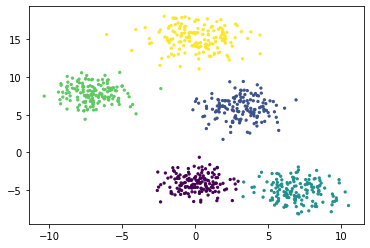

In [110]:
# 超参
K = 5
NUM_SCALE = 150
LOSS_LIMIT = [1,1e-2,1e-8]
MEAN = [[0,-4],[3,6],[7,-5],[-7,8],[0,15]]
SIGMA = [[[1.4,0],[0,1.4]],[[1.8,0],[0,1.8]],[[2.25,0],[0,2.25]],[[1.7,0],[0,1.7]],[[2.55,0],[0,2.55]]]
data = makeData(K,NUM_SCALE,MEAN,SIGMA)
plt.scatter(data[0:,0],data[0:,1],c=data[0:, 2],s=5)

轮廓系数:0.7030374445612791


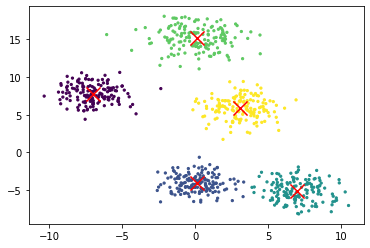

轮廓系数:0.4665638102262549


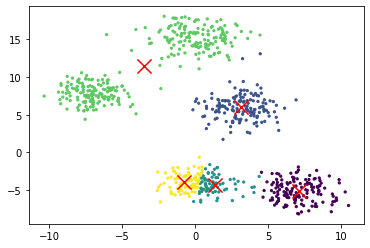

轮廓系数:0.7030374445612791


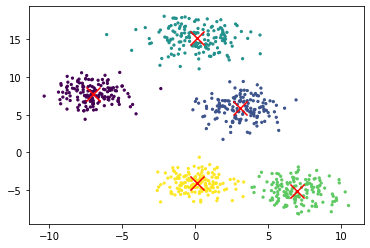

轮廓系数:0.4880909782919473


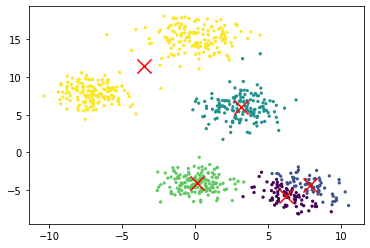

轮廓系数:0.7030374445612786


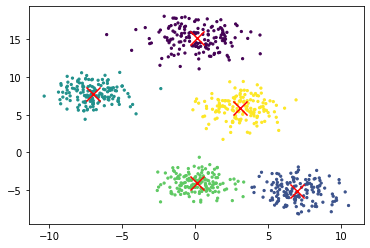

In [111]:
for i in range(0,5):
    result,ck,initCenter=KMeansSolver(K,NUM_SCALE,1e-4,np.random.permutation(data[:]))
    initCenter = np.array(initCenter)
    print("轮廓系数:{}".format(judgeResult(result,K)))
    plt.scatter(result[0:,0],result[0:,1],c=result[0:, 2],s=5)
    plt.scatter(initCenter[0:,0],initCenter[0:,1],s=200,marker='x',color='red')
    plt.show()